### Importing libraries 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from dateutil import parser
import matplotlib.pyplot as plt

### Importing Data

In [2]:
df = pd.read_csv('../data/ytdataframe.csv')

dff = pd.read_csv(r'C:\Users\wled3\ytunlabeled2.csv')

In [3]:
df.head(1)

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,subscribers,totalViews,totalVideos,avg polarity score,Label
0,0,-SejlHOXexc,Tech Tutorial,How to download facebook stories in your phone,Hey friends today we have another great topic ...,"['facebook stories in your phone', 'download f...",2019-11-02T14:25:35Z,969189,11109,NaN,338,PT3M55S,hd,False,140000,8665833,161,0.008202,non reputable


In [4]:
df = df.append(dff)

df.head(1)

C:\Users\wled3\AppData\Local\Temp\ipykernel_28424\4047219614.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)


,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,subscribers,totalViews,totalVideos,avg polarity score,Label
0,0,-SejlHOXexc,Tech Tutorial,How to download facebook stories in your phone,Hey friends today we have another great topic ...,"['facebook stories in your phone', 'download f...",2019-11-02T14:25:35Z,969189,11109,NaN,338,PT3M55S,hd,False,140000,8665833,161,0.008202,non reputable


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 0 to 388
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          534 non-null    int64  
 1   video_id            534 non-null    object 
 2   channelTitle        534 non-null    object 
 3   title               534 non-null    object 
 4   description         505 non-null    object 
 5   tags                478 non-null    object 
 6   publishedAt         534 non-null    object 
 7   viewCount           534 non-null    int64  
 8   likeCount           534 non-null    int64  
 9   favouriteCount      0 non-null      float64
 10  commentCount        534 non-null    int64  
 11  duration            534 non-null    object 
 12  definition          534 non-null    object 
 13  caption             534 non-null    bool   
 14  subscribers         534 non-null    int64  
 15  totalViews          534 non-null    int64  
 16  totalVid

# Data preprocessing 

Checking duplicates

In [6]:
df.duplicated().sum()


0

In [7]:
df = df.drop_duplicates()
df.shape

(534, 19)

Checking null values

In [8]:
df.isnull().sum()


Unnamed: 0              0
video_id                0
channelTitle            0
title                   0
description            29
tags                   56
publishedAt             0
viewCount               0
likeCount               0
favouriteCount        534
commentCount            0
duration                0
definition              0
caption                 0
subscribers             0
totalViews              0
totalVideos             0
avg polarity score      0
Label                 389
dtype: int64

Convert count columns to numeric

In [9]:
numeric_cols = ['viewCount', 'likeCount', 'commentCount']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

# dff[numeric_cols] = dff[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

Convert publish date to year

In [10]:
df['publishedAt'] = df['publishedAt'].apply(lambda x: parser.parse(x)) 
df['pushblishYear'] = df['publishedAt'].apply(lambda x: x.strftime("%Y"))

# dff['publishedAt'] = dff['publishedAt'].apply(lambda x: parser.parse(x)) 
# dff['pushblishYear'] = dff['publishedAt'].apply(lambda x: x.strftime("%Y"))

Convert duration to seconds

In [11]:
import isodate
df['durationSecs'] = df['duration'].apply(lambda x: isodate.parse_duration(x))
df['durationSecs'] = df['durationSecs'].astype('timedelta64[s]')

# dff['durationSecs'] = dff['duration'].apply(lambda x: isodate.parse_duration(x))
# dff['durationSecs'] = dff['durationSecs'].astype('timedelta64[s]')

Add tag count

In [12]:


df['tagCount'] = df['tags'].apply(lambda x: 0 if x is np.nan else len(x))

# dff['tagCount'] = dff['tags'].apply(lambda x: 0 if x is np.nan else len(x))

Add title and description length

In [13]:
df['title length'] = df['title'].apply(lambda x: 0 if x is np.nan else len(x))
df['description length'] = df['description'].apply(lambda x: 0 if x is np.nan else len(x))

# dff['title length'] = dff['title'].apply(lambda x: 0 if x is np.nan else len(x))
# dff['description length'] = dff['description'].apply(lambda x: 0 if x is np.nan else len(x))


In [14]:
df['Label'] = df['Label'].apply(lambda x: -1 if x is np.nan else ( 1 if x == 'reputable' else 0))


Dropping columns we wont use

In [15]:
df = df.drop(['Unnamed: 0', 'description', 'title', 'publishedAt', 'duration', 'favouriteCount', 'video_id', 'tags'], axis=1)

# dff = dff.drop(['Unnamed: 0', 'description', 'title', 'publishedAt', 'duration', 'favouriteCount', 'video_id', 'tags'], axis=1)


# EDA

### Label distribution 

-1    389
 1     87
 0     58
Name: Label, dtype: int64

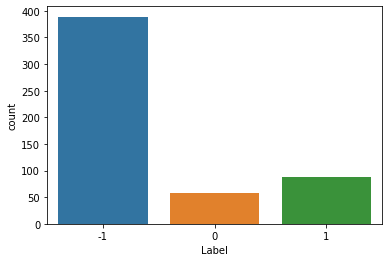

In [16]:
sns.countplot(x="Label", data=df)
df["Label"].value_counts()

Our data is unbalanced so we might need oversampling

In [17]:
# sns.scatterplot(x="commentCount", y="durationSecs", hue="Label", data = df)

In [18]:
# df_dist = df.select_dtypes([int,float]) 
# fig = plt.figure(figsize=(15, 18)) 
# try:
#     for i,columns in enumerate(df_dist.columns, 1): 
#         ax = plt.subplot(5,3,i) 
#         sns.kdeplot(x=df_dist[columns])
#         ax.set_xlabel(None) 
#         ax.set_title(f'{columns}')
#         plt.tight_layout(w_pad=3) 
# except ValueError as ve:
#     exit;      
# plt.show()

# Modeling

In [19]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

Label encoding 

In [20]:
le = LabelEncoder()

df2 = ['channelTitle', 'definition', 'caption']

df[df2] = df[df2].apply(le.fit_transform)

# dffs = ['channelTitle', 'definition', 'caption']
# dff[dffs] = dff[dffs].apply(le.fit_transform)

df.isnull().sum()

channelTitle          0
viewCount             0
likeCount             0
commentCount          0
definition            0
caption               0
subscribers           0
totalViews            0
totalVideos           0
avg polarity score    0
Label                 0
pushblishYear         0
durationSecs          0
tagCount              0
title length          0
description length    0
dtype: int64

Splitting

In [21]:
# from sklearn.preprocessing import StandardScaler
# scale = StandardScaler()


feat_col = ['channelTitle', 'viewCount', 'likeCount', 'definition', 'commentCount', 'caption', 'subscribers', 'totalViews', 'totalVideos', 'avg polarity score', 'pushblishYear', 'durationSecs', 'tagCount', 'description length', 'title length']

X = df[feat_col] # Features
y = df['Label'].values # Target variable

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

### Modeling using LabelPropagation 

In [23]:
from sklearn.semi_supervised import LabelPropagation

#Configure model parameters 
model_LP_knn = LabelPropagation(kernel='knn', # {'knn', 'rbf'} default='rbf'
                              #gamma=70, # default=20, Parameter for rbf kernel.
                              n_neighbors=20, # default=7, Parameter for knn kernel which is a strictly positive integer.
                              max_iter=1000, # default=30, Maximum number of iterations allowed.
                              tol=0.001, # default=1e-3, Convergence tolerance: threshold to consider the system at steady state.
                              n_jobs=-1, # default=None, The number of parallel jobs to run. -1 means using all processors. 
                             )

###Fit the model
LP_knn=model_LP_knn.fit(X_train, y_train)


### Model evaluation

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

###exclude observations with known records before evcaluating model performance
labels_orig = np.copy(df.Label)

df_eval=df[['Label']].copy() # Copy dataframe with dependents info
df_eval['Predicted_label']=LP_knn.transduction_ # Attach model predictions
df_eval=df_eval[df_eval['Label']==-1] # Keep only records containing masked labels




###Print the summary of model results

print("Model Name: ", str(LP_knn))
print("Classes: ", LP_knn.classes_)
print("Label Distributions: ", LP_knn.label_distributions_)
print("Transduction Label: ", LP_knn.transduction_)
print("No. of features: ", LP_knn.n_features_in_)
print("No. of iterations: ", LP_knn.n_iter_)
print('')
print('*************** Evaluation of LP knn model ***************')
print(classification_report(df_eval['Label'], df_eval['Predicted_label']))
print('')
print('******************** Confusion Matrix ********************')
cm= confusion_matrix(df_eval['Label'], df_eval['Predicted_label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LP_knn.classes_)
disp.plot()
plt.show()

ValueError: Length of values (400) does not match length of index (534)

# Save model

In [ ]:
import pickle

pickle.dump(LP_knn, open('LP_knn_Model', 'wb'))